In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.transpiler import InstructionProperties
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import PassManager

service = QiskitRuntimeService()



In [3]:
backend1 = service.backend("ibm_sherbrooke") 
target = backend1.target
basis_gates = list(target.operation_names)

In [4]:
def get_ghz_circ_static(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

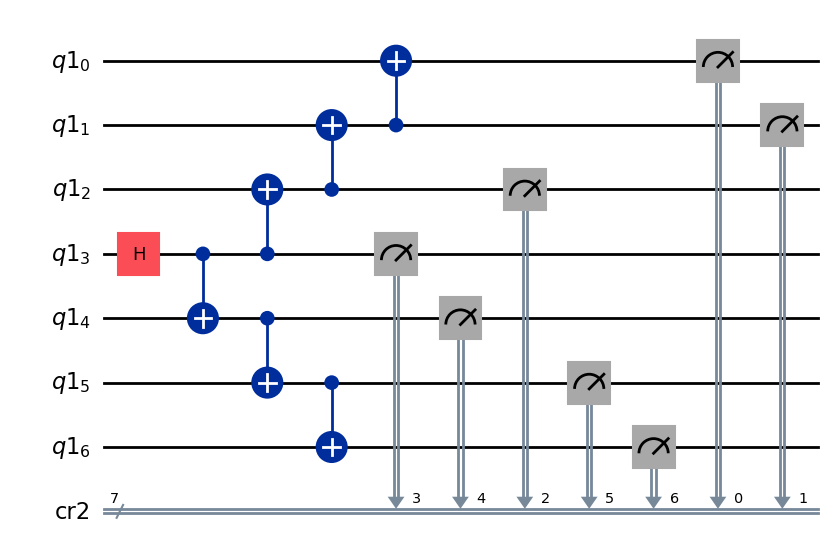

In [5]:
qc = get_ghz_circ_static(num_qubit=7)
qc.draw("mpl")

In [5]:
#dynamic circuit using qubit-reuse in aersimulator

In [6]:
def get_ghz_circ_static_1(num_qubit):
    if num_qubit%2==1:                                                     #odd no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-1)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-1):
            qc.cx(i,i+1)
            qc.cx(num_qubit-i-1,num_qubit-i-2)
        

    else:                                                                    #even no of qubits
        qr=QuantumRegister(num_qubit)
        cr2=ClassicalRegister(num_qubit,name="cr2")                     
        qc=QuantumCircuit(qr,cr2)
        mid_qubit_index=int((num_qubit-2)/2)
        qc.h(mid_qubit_index)
        for i in range(mid_qubit_index,num_qubit-2):
            qc.cx(i,i+1)
            qc.cx(num_qubit-1-i-1,num_qubit-i-3)
        qc.cx(num_qubit-2,num_qubit-1)
    for i in range(num_qubit):
        qc.measure(qr[i],cr2[i])
    return qc

In [7]:
#creating dynamic circuit from a separate static circuit
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def get_ghz_circ_dynamic_2(num_qubit):
    qc=get_ghz_circ_static_1(num_qubit)
    aer_sim = AerSimulator()
    pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1, init_method="qubit_reuse")
    transpiled_qc = pm.run(qc)
    
    return transpiled_qc

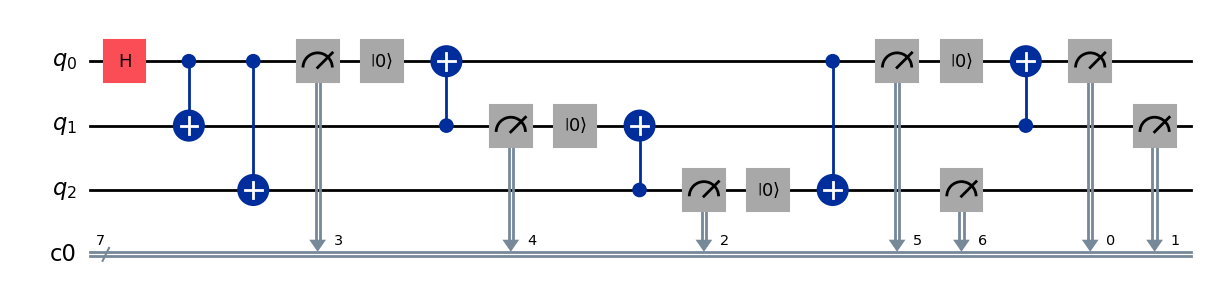

In [8]:
qc = get_ghz_circ_dynamic_2(num_qubit=7)
qc.draw("mpl")

In [9]:
#Creating list of circuits[Static_1, Dynamic1_1, Dynamic2_1, Static_1, Dynamic1_1, Dynamic2_1,...,Static_2, Dynamic1_2, Dynamic2_2, Static_2, Dynamic1_2, Dynamic2_2,...] i.e. some copies of each of them

min_qubit=12
max_num_qubit=18
copies=4

#qc_list_dynamic_1=[]
#qc_list_dynamic_2=[]
#qc_list_static=[]
#observables=[]

qc_list=[]
num_qubit_list=list(range(min_qubit,max_num_qubit+1))
for num_qubit in num_qubit_list:
    for i in range(copies):
        qc_list.append(get_ghz_circ_static(num_qubit))
        #qc_list.append(get_ghz_circ_dynamic_1(num_qubit))
        qc_list.append(get_ghz_circ_dynamic_2(num_qubit))
print(num_qubit_list)

[12, 13, 14, 15, 16, 17, 18]


In [10]:
#Ideal Simulation with AerSimulator
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
 
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=2,basis_gates=basis_gates)
qc_transpiled_list=[]

qc_transpiled_list_ideal = pm.run(qc_list)

In [11]:
sampler = Sampler(backend=aer_sim)
result_ideal = sampler.run(qc_transpiled_list_ideal).result()

In [12]:
print(result_ideal)
len(result_ideal)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=12>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))), PubResult(data=DataBin(cr2=

56

In [14]:
# For getting list of ideal counts (argument required for Fidelity)
counts_list_ideal=[]
k=1
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_ideal[(2*i*copies)+(2*j)].data    
        #data_dynamic_1 = result_ideal[(3*i*copies)+((3*j)+1)].data 
        data_dynamic_2 = result_ideal[(2*i*copies)+((2*j)+1)].data

        print(data_static)
        #print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        
        # Replacing 'cr2' with the appropriate attribute if needed
        dynamic_2_attr_name = f'c{2*(k)}'
        if hasattr(data_dynamic_2, dynamic_2_attr_name):
            counts_dynamic_2 = getattr(data_dynamic_2, dynamic_2_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_2_attr_name} not found in data_dynamic_2")
        
        counts_list_ideal.append(counts_static)
        #counts_list_ideal.append(counts_dynamic_1)
        counts_list_ideal.append(counts_dynamic_2)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c16=BitArray(<shape=(), num_shots=1024, num_bits=13

In [15]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

 
# Save an IBM Quantum account and set it as your default account.

 
# Load saved credentials
service = QiskitRuntimeService()
backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=2, backend=backend, basis_gates=basis_gates)
qc_transpiled_list = pm.run(qc_list)

In [17]:
for i in range(len(qc_transpiled_list)):
    print(qc_transpiled_list[i].depth())

37
143
37
143
37
143
34
143
39
129
40
129
43
129
40
138
43
169
39
169
43
169
43
169
34
159
45
161
41
159
45
158
46
192
34
192
46
192
42
192
45
178
49
178
48
187
50
178
50
237
45
237
48
237
48
237


In [18]:
#Executing the circuit
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)

from qiskit_ibm_runtime import Options
 
# Estimator and Sampler now have different options
options = sampler.options
 
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = 'XY4'
#dynamical_decoupling={'enable':True, 'sequence_type':'XpXm'}
job = sampler.run(qc_transpiled_list,shots=1024)
print(job.job_id())

cvw3ces7cb40008e8kag


In [36]:
#Post-processing
import matplotlib.pyplot as plt
import statistics
from qiskit_ibm_runtime import QiskitRuntimeService

job_id = 'cvw3ces7cb40008e8kag' #Sherbrooke

service = QiskitRuntimeService()
job = service.job(job_id)
result_real = job.result()

In [37]:
print(result_real)
len(result_real)

PrimitiveResult([PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=12>)), metadata={'circuit_metadata': {}}), PubResult(data=DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_

56

In [38]:
#Finding the metrics of the job
result_metric_real=job.metrics()
print(result_metric_real)

{'bss': {'seconds': 183}, 'usage': {'quantum_seconds': 183, 'seconds': 183}, 'timestamps': {'created': '2024-09-28T17:00:43.293Z', 'finished': '2024-09-28T17:19:51.863Z', 'running': '2024-09-28T17:00:44.724Z'}, 'executions': 57344, 'num_circuits': 56, 'num_qubits': [127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127], 'circuit_depths': [55, 243, 55, 243, 55, 243, 55, 243, 63, 247, 63, 247, 61, 247, 63, 252, 59, 295, 57, 295, 59, 295, 61, 295, 61, 299, 66, 312, 66, 299, 66, 311, 66, 338, 60, 338, 64, 338, 66, 338, 61, 342, 65, 342, 67, 347, 73, 342, 75, 405, 72, 405, 66, 405, 68, 405], 'qiskit_version': 'qiskit_ibm_runtime-0.23.0,qiskit-1.1.0*,qiskit_aer-0.14.2*,qiskit_experiments-0.6.1,circuit_knitting_toolbox-0.7.2', 'estimated_start_time': '2024-09-28T17:00:43

In [40]:
# For getting list of real counts of IBM brisbane (argument required for Fidelity)
counts_list_real=[]
k=1
for i in range(len(num_qubit_list)):  
    for j in range(copies):
        data_static = result_real[(2*i*copies)+(2*j)].data    
        #data_dynamic_1 = result_real[(3*i*copies)+((3*j)+1)].data 
        data_dynamic_2 = result_real[(2*i*copies)+((2*j)+1)].data

        print(data_static)
        #print(data_dynamic_1)
        print(data_dynamic_2)
        
        counts_static=data_static.cr2.get_counts()
        #counts_dynamic_1=data_dynamic_1.cr2.get_counts()
        
        # Replacing 'cr3' with the appropriate attribute if needed
        dynamic_2_attr_name = f'c{2*(k)}'
        if hasattr(data_dynamic_2, dynamic_2_attr_name):
            counts_dynamic_2 = getattr(data_dynamic_2, dynamic_2_attr_name).get_counts()
        else:
            raise AttributeError(f"{dynamic_2_attr_name} not found in data_dynamic_2")
        
        counts_list_real.append(counts_static)
        #counts_list_real.append(counts_dynamic_1)
        counts_list_real.append(counts_dynamic_2)
        k=k+1

DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c4=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c6=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(c8=BitArray(<shape=(), num_shots=1024, num_bits=12>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c10=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c12=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c14=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(cr2=BitArray(<shape=(), num_shots=1024, num_bits=13>))
DataBin(c16=BitArray(<shape=(), num_shots=1024, num_bits=13

In [41]:
#Calculation of lists of Fidelity mean and std deviation of real hardware simulation in ibm_sherbrooke
import statistics
from qiskit.quantum_info.analysis import hellinger_fidelity
# We will create 4 lists of Fidelities, for storing mean, std deviation of Fidelity, of copies of a circuit for fixed no of logical qubits
 
Fidelity_mean_static_sherbrooke=[]
#Fidelity_mean_dynamic_1_sherbrooke=[]
Fidelity_mean_dynamic_2_sherbrooke=[]

Fidelity_std_static_sherbrooke=[]
#Fidelity_std_dynamic_1_sherbrooke=[]
Fidelity_std_dynamic_2_sherbrooke=[]

Fidelity_copies_static_sherbrooke=[]
#Fidelity_copies_dynamic_1_sherbrooke=[]
Fidelity_copies_dynamic_2_sherbrooke=[]

for i in range(len(num_qubit_list)):
    
    for j in range(copies):
        
        Fidelity_static= hellinger_fidelity(counts_list_ideal[(2*i*copies)+(2*j)], counts_list_real[(2*i*copies)+(2*j)])
        #Fidelity_dynamic_1=hellinger_fidelity(counts_list_ideal[(3*i*copies)+((3*j)+1)], counts_list_real[(3*i*copies)+((3*j)+1)])
        Fidelity_dynamic_2=hellinger_fidelity(counts_list_ideal[(2*i*copies)+((2*j)+1)], counts_list_real[(2*i*copies)+((2*j)+1)])
        
        Fidelity_copies_static_sherbrooke.append(Fidelity_static)
        #Fidelity_copies_dynamic_1_sherbrooke.append(Fidelity_dynamic_1)
        Fidelity_copies_dynamic_2_sherbrooke.append(Fidelity_dynamic_2)

    
    Fidelity_mean_static_sherbrooke.append(statistics.mean(Fidelity_copies_static_sherbrooke))
    #Fidelity_mean_dynamic_1_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_1_sherbrooke))
    Fidelity_mean_dynamic_2_sherbrooke.append(statistics.mean(Fidelity_copies_dynamic_2_sherbrooke))
    
    Fidelity_std_static_sherbrooke.append(statistics.stdev(Fidelity_copies_static_sherbrooke))
    #Fidelity_std_dynamic_1_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_1_sherbrooke))
    Fidelity_std_dynamic_2_sherbrooke.append(statistics.stdev(Fidelity_copies_dynamic_2_sherbrooke))
    
    Fidelity_copies_static_sherbrooke.clear()
    #Fidelity_copies_dynamic_1_sherbrooke.clear()
    Fidelity_copies_dynamic_2_sherbrooke.clear()

[0.5842150329892616, 0.5568433600813605, 0.4307959781267685, 0.5277790603278918, 0.368408029542423, 0.3878038827293598, 0.36467247925242446]
[0.5279373625798975, 0.5939629200441793, 0.5579520805996188, 0.597682242399173, 0.36297049135005055, 0.5449535198243542, 0.324066480879213]
[0.09702158336592037, 0.10227893054539605, 0.09610035041127614, 0.051516951704739314, 0.1510482005193279, 0.13013026809790923, 0.04130626649961338]
[0.010111074157149007, 0.033103545841365815, 0.008099200606298424, 0.02935747928384818, 0.0065478317961844956, 0.06167459898135773, 0.013955377463008668]


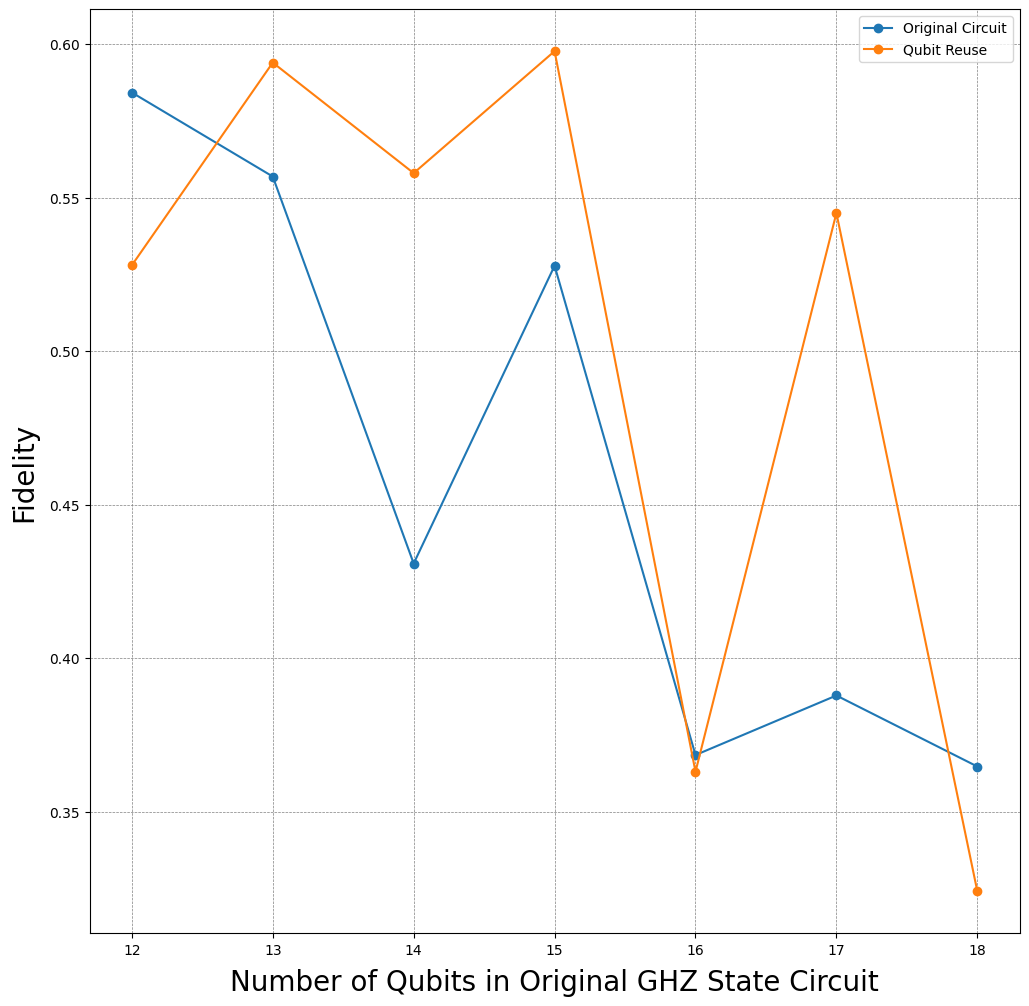

In [44]:
# Graph plotting
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#figure(figsize=(16,12), dpi=180)
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))

# Create  data.
ax1.set_xlabel('Number of Qubits in Original GHZ State Circuit',fontsize=20,labelpad=8)
ax1.set_ylabel('Fidelity',fontsize=20,labelpad=8)
#ax1.set_title('ibm_sherbrooke XY4 DD')

x1 = num_qubit_list
y1_static = Fidelity_mean_static_sherbrooke
#y1_dynamic_1 = Fidelity_mean_dynamic_1_sherbrooke
y1_dynamic_2 = Fidelity_mean_dynamic_2_sherbrooke
print(y1_static)
#print(y1_dynamic_1)
print(y1_dynamic_2)

y_error_static =Fidelity_std_static_sherbrooke
#y_error_dynamic_1 =Fidelity_std_dynamic_1_sherbrooke
y_error_dynamic_2 =Fidelity_std_dynamic_2_sherbrooke
print(y_error_static)
#print(y1_dynamic_1)
print(y_error_dynamic_2)
ax1.set_xticks(num_qubit_list)
ax1.plot(x1, y1_static, 'o-',label='Original Circuit')
#ax1.plot(x1, y1_dynamic_1, 'o-',label='dynamic_1')
ax1.plot(x1, y1_dynamic_2, 'o-',label='Qubit Reuse')
"""
ax1.errorbar(x1, y1_static,
			yerr = y_error_static, label='Original Circuit error bar',
			fmt ='o',capsize=5, capthick=3)
#ax1.errorbar(x1, y1_dynamic_1,
			#yerr = y_error_dynamic_1, label='dynamic_1',
			#fmt ='o')
ax1.errorbar(x1, y1_dynamic_2,
			yerr = y_error_dynamic_2, label='Qubit Reuse error bar',
			fmt ='o',capsize=5, capthick=3)

"""
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
#ibm sherbrooke XY4DD

In [25]:
# analysis for transpiled circuits
Layouts=[]
p=qc_transpiled_list[0]._layout
#for i in range(len(qc_transpiled_list)):
 #   print(qc_transpiled_list[i].depth())
print(p)

TranspileLayout(initial_layout=Layout({
65: Qubit(QuantumRegister(12, 'q7'), 5),
66: Qubit(QuantumRegister(12, 'q7'), 6),
64: Qubit(QuantumRegister(12, 'q7'), 4),
67: Qubit(QuantumRegister(12, 'q7'), 7),
63: Qubit(QuantumRegister(12, 'q7'), 3),
68: Qubit(QuantumRegister(12, 'q7'), 8),
62: Qubit(QuantumRegister(12, 'q7'), 2),
69: Qubit(QuantumRegister(12, 'q7'), 9),
61: Qubit(QuantumRegister(12, 'q7'), 1),
70: Qubit(QuantumRegister(12, 'q7'), 10),
60: Qubit(QuantumRegister(12, 'q7'), 0),
74: Qubit(QuantumRegister(12, 'q7'), 11),
0: Qubit(QuantumRegister(115, 'ancilla'), 0),
1: Qubit(QuantumRegister(115, 'ancilla'), 1),
2: Qubit(QuantumRegister(115, 'ancilla'), 2),
3: Qubit(QuantumRegister(115, 'ancilla'), 3),
4: Qubit(QuantumRegister(115, 'ancilla'), 4),
5: Qubit(QuantumRegister(115, 'ancilla'), 5),
6: Qubit(QuantumRegister(115, 'ancilla'), 6),
7: Qubit(QuantumRegister(115, 'ancilla'), 7),
8: Qubit(QuantumRegister(115, 'ancilla'), 8),
9: Qubit(QuantumRegister(115, 'ancilla'), 9),
10: Qu

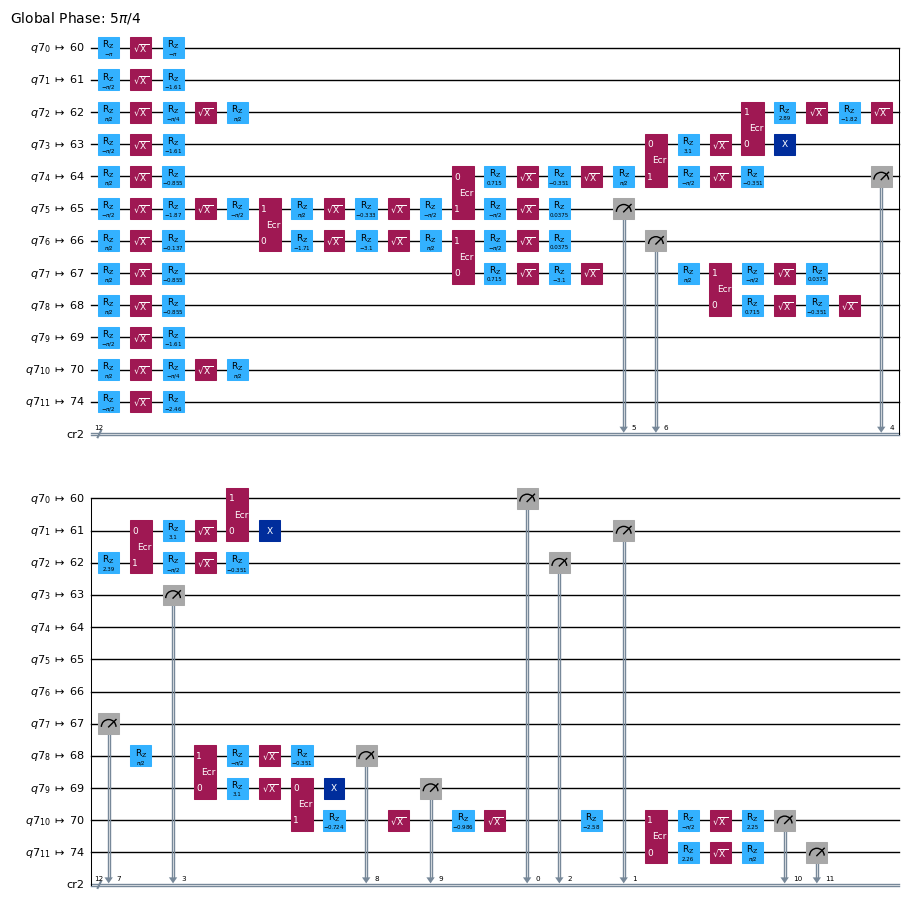

In [27]:
qc_transpiled_list[0].draw("mpl",idle_wires=False,scale=0.5)

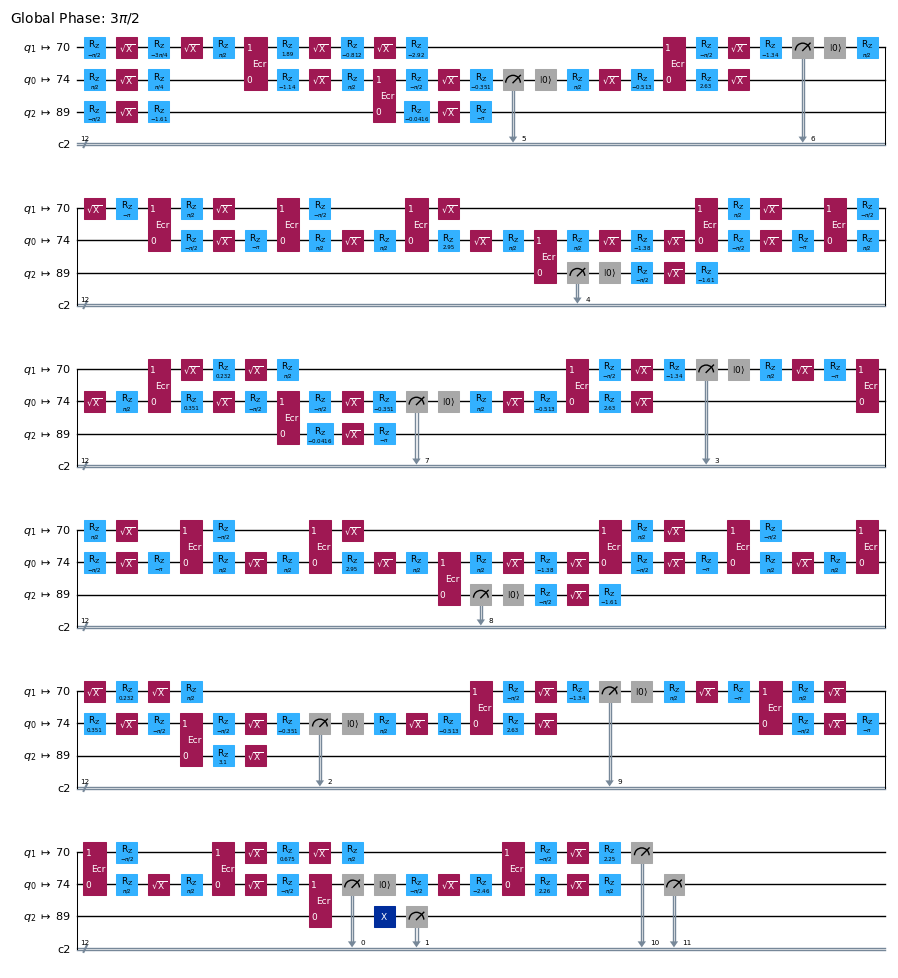

In [28]:
qc_transpiled_list[1].draw("mpl",idle_wires=False,scale=0.5)

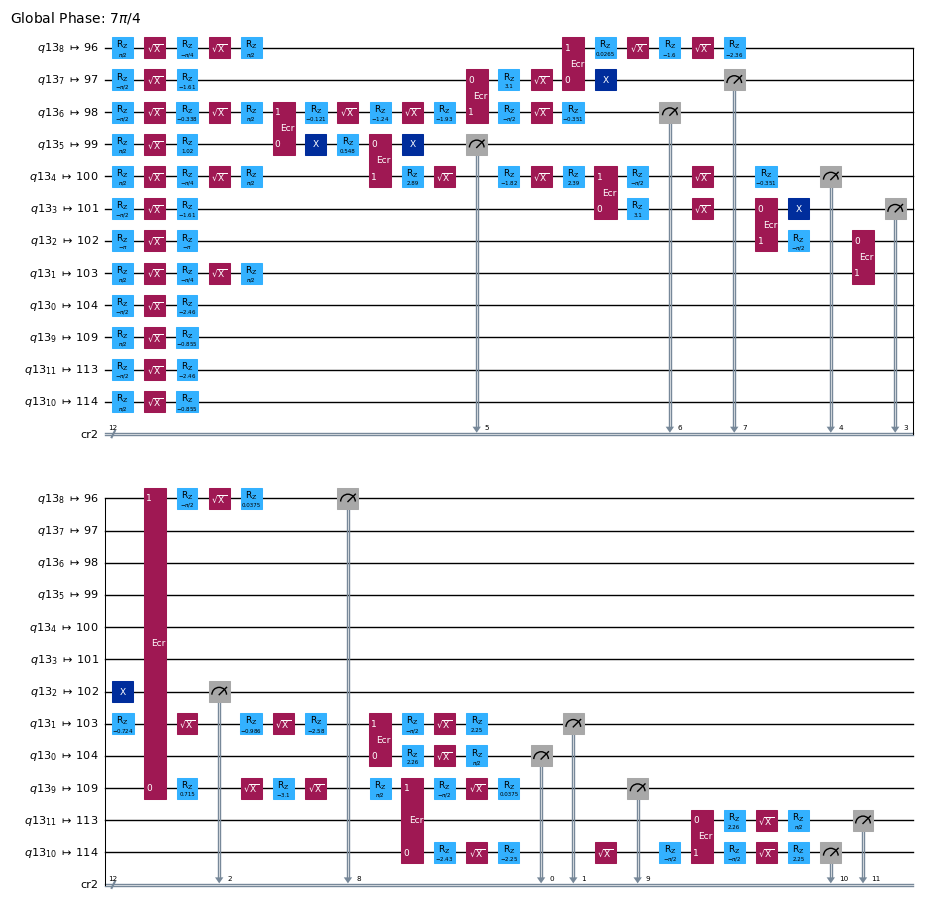

In [29]:
qc_transpiled_list[2].draw("mpl",idle_wires=False,scale=0.5)

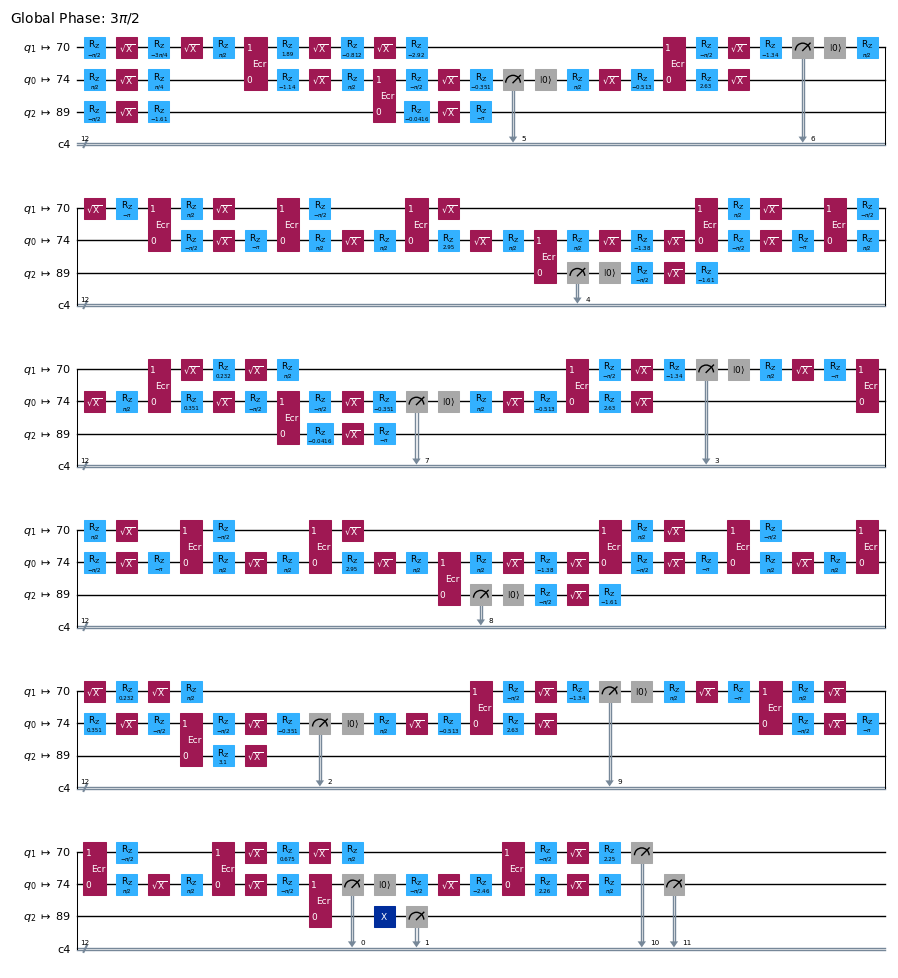

In [30]:
qc_transpiled_list[3].draw("mpl",idle_wires=False,scale=0.5)

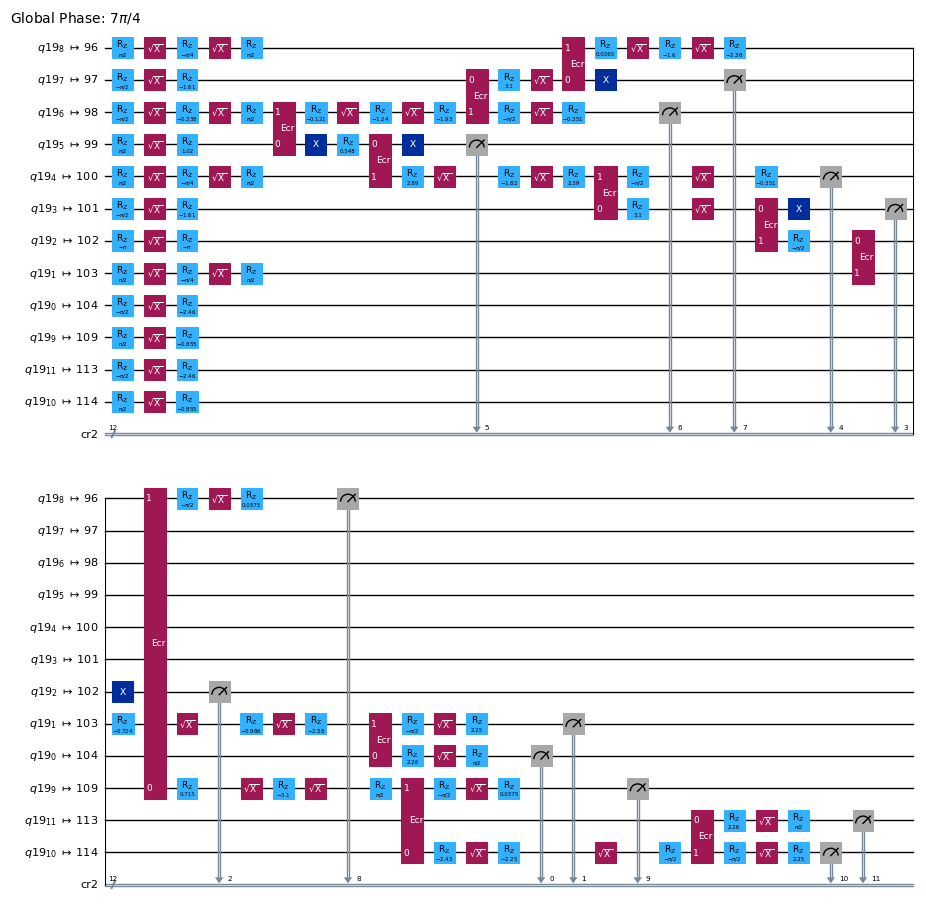

In [31]:
qc_transpiled_list[4].draw("mpl",idle_wires=False,scale=0.5)

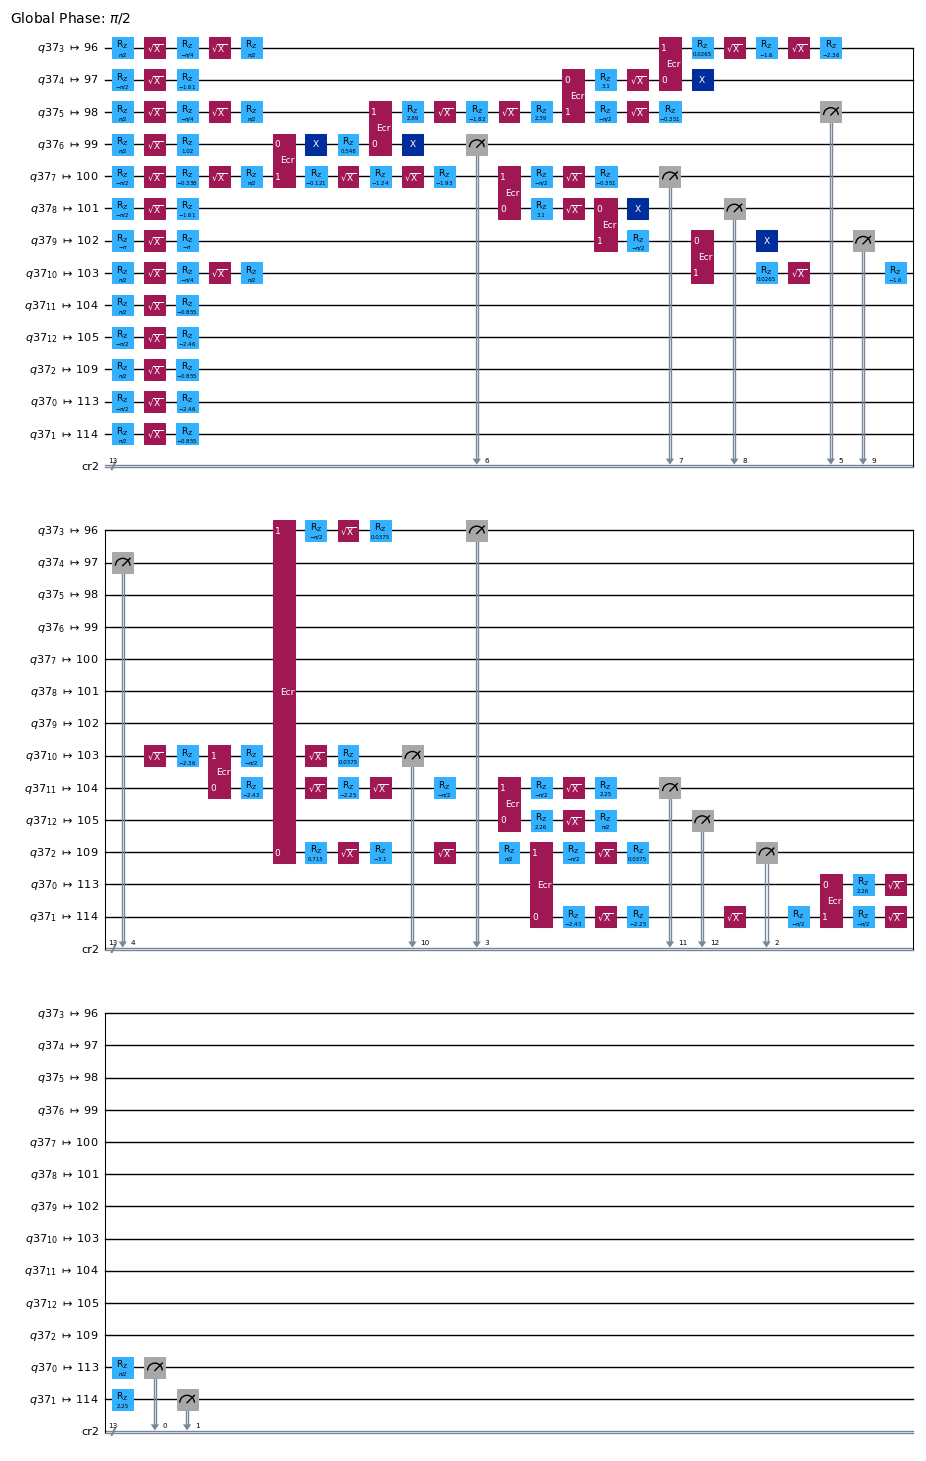

In [35]:
qc_transpiled_list[10].draw("mpl",idle_wires=False,scale=0.5)